In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Upload kaggle API key file
uploaded = files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip \*.zip

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
churn_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
N = churn_data.shape[0]
hasNotChurned = sum(churn_data['Churn']=='No')
hasChurned = sum(churn_data['Churn']=='Yes')

print(f'customers: {N}\n')
# print(f'Number of columns: {churn_data.shape[1]}')
print(f'customers who churned: {hasChurned}')
print(f"customers who haven't churned yet: {hasNotChurned}\n")
print(f'percentage of customers who churned: {100*hasChurned/len(churn_data):.0f}%')
print(f"percentage of customers who haven't churned yet: {100*hasNotChurned/len(churn_data):.0f}%")

customers: 7043

customers who churned: 1869
customers who haven't churned yet: 5174

percentage of customers who churned: 27%
percentage of customers who haven't churned yet: 73%


In [6]:
# Drop customerID column and TotalCharges column
# otherwise together with MonthlyCharges we can deduce how many months someone have been subscribed
churn_data = churn_data.drop(['customerID', 'TotalCharges'], axis=1)

In [7]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [8]:
#!pip install scikit-survival
from sksurv.datasets import get_x_y

X, y = get_x_y(churn_data, attr_labels=['Churn','tenure'], pos_label='Yes')

In [9]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [10]:
y[:10]

array([(False,  1.), (False, 34.), ( True,  2.), (False, 45.),
       ( True,  2.), ( True,  8.), (False, 22.), (False, 10.),
       ( True, 28.), (False, 62.)],
      dtype=[('Churn', '?'), ('tenure', '<f8')])

     |████████████████████████████████| 340 kB 11.4 MB/s 


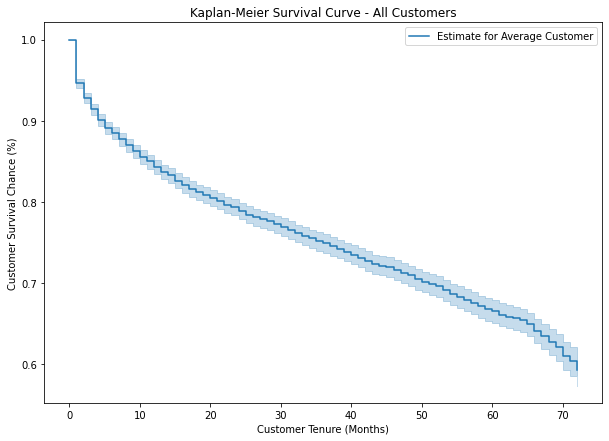

In [12]:
!pip install lifelines
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(y['tenure'], y['Churn'], label='Estimate for Average Customer')
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve - All Customers')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

In [14]:
def plot_KM(label, title):
    fig, ax = plt.subplots(figsize=(10,7))
    for r in X[label].unique():
        ix = X[label] == r
        kmf.fit(y['tenure'][ix], y['Churn'][ix], label=r)
        kmf.plot(ax=ax)
    plt.title(title)
    ax.set_xlabel('Customer Tenure (Months)')
    ax.set_ylabel('Customer Survival Chance (%)')
    plt.show()

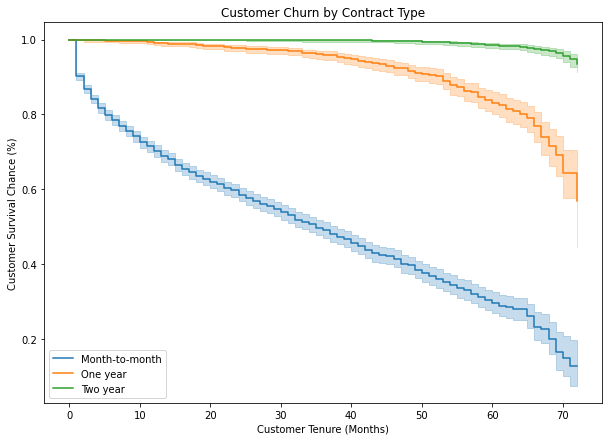

In [15]:
plot_KM('Contract', 'Customer Churn by Contract Type')

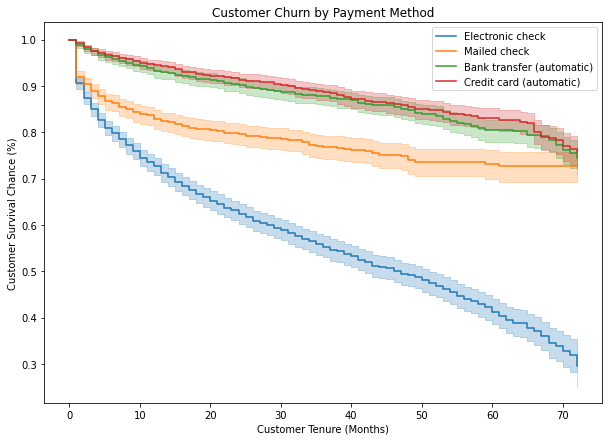

In [16]:
plot_KM('PaymentMethod', 'Customer Churn by Payment Method')

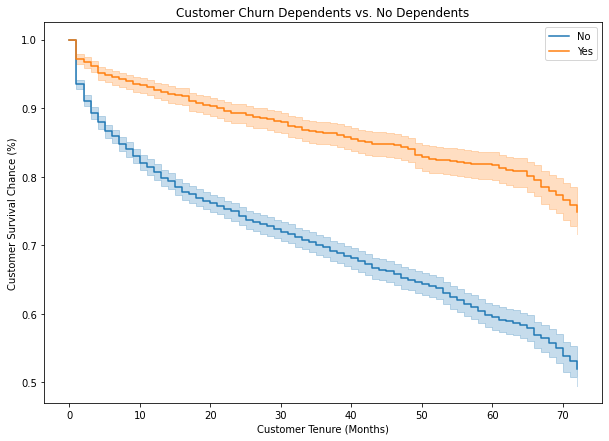

In [17]:
plot_KM('Dependents', 'Customer Churn Dependents vs. No Dependents')

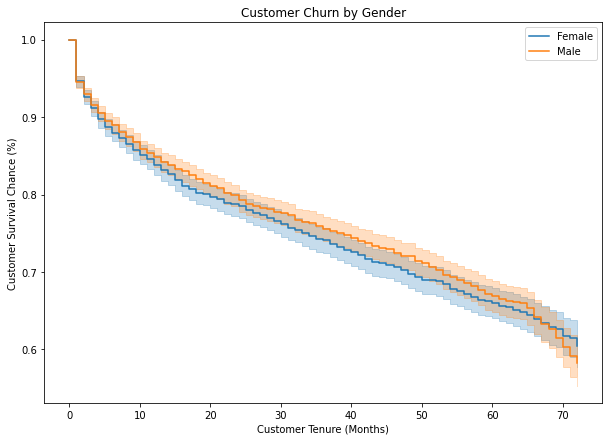

In [18]:
plot_KM('gender', 'Customer Churn by Gender')

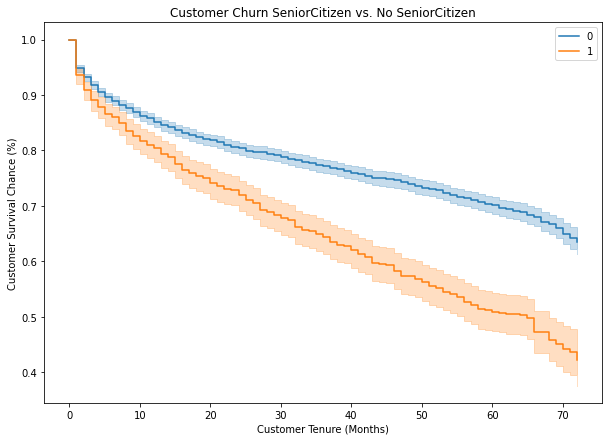

In [19]:
plot_KM('SeniorCitizen', 'Customer Churn SeniorCitizen vs. No SeniorCitizen')

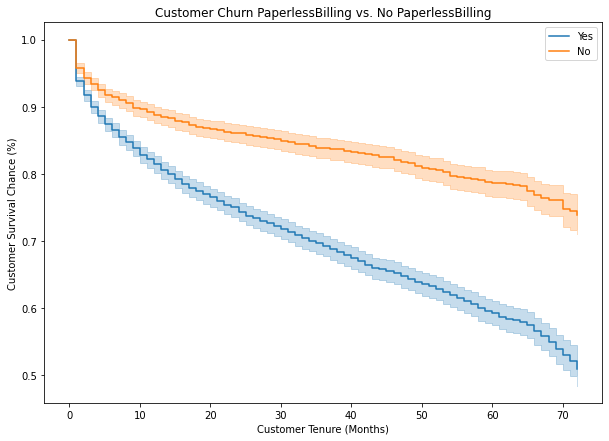

In [20]:
plot_KM('PaperlessBilling', 'Customer Churn PaperlessBilling vs. No PaperlessBilling')